In [43]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [44]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [45]:
iris = load_iris()

In [46]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [47]:
data1 = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [48]:
data = data1[['sepal length (cm)', 'sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [49]:
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
lda = LinearDiscriminantAnalysis()

In [20]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [21]:
lda.predict(X_test)

array([0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, lda.predict(X_test))

0.7105263157894737

In [27]:
lda.means_

array([[5.        , 3.42      ],
       [5.88235294, 2.77941176],
       [6.67894737, 3.01052632]])

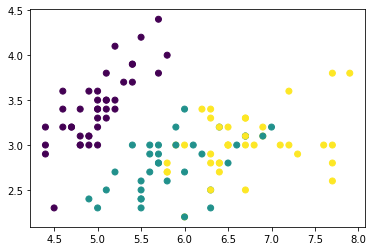

In [29]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

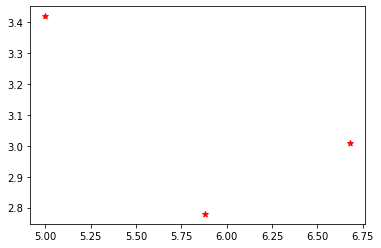

In [35]:
plt.scatter(lda.means_[:,0], lda.means_[:,1], c='red', marker = '*')
plt.show()

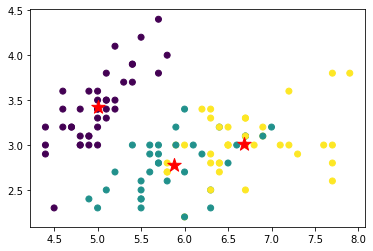

In [38]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train, )
plt.scatter(lda.means_[:,0], lda.means_[:,1], c='red', marker = '*', s=200)


In [39]:
data = data1[['sepal length (cm)', 'sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [40]:
from sklearn.cluster import KMeans

In [51]:
k = KMeans(n_clusters=3)
data1 = k.fit_predict(data)

In [52]:
data1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

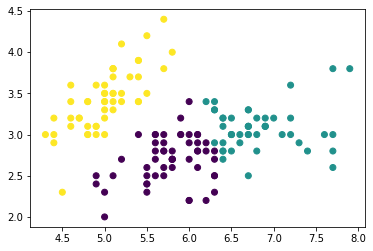

In [54]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data1)
plt.show()

In [56]:
data['new']= data1

In [57]:
data

,sepal length (cm),sepal width (cm),new
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1
